### Aplicación de PCA y K-MEANS al **CRISIS DEL COVID**
#### TEST DE SALUD*TECNOLOGÏA

#### **Contexto**
La pandemia del COVID-19 representó una crisis de salud global sin precedentes recientes, afectando a casi todos los países del mundo con efectos duraderos. Provocó millones de muertes, confinamientos masivos, un impacto profundo en la economía global, en los sistemas de salud, en las cadenas de abastecimiento y en la vida cotidiana.

---


#### **Impacto en Programas de Gobierno**
1. **Salud Pública y Bienestar Social**:
   - Políticas para atender necesidades sociales críticas durante la pandemia.
   - Reducir desigualdades sociales y económicas exacerbadas por el COVID-19.

2. **Economía y Regulación**:
   - Planificación económica para abordar las crisis provocadas por el COVID-19.
   - Regulaciones para estabilizar mercados y apoyar a sectores afectados.
   - Colaboración entre el sector público y privado para responder a la crisis.

3. **Infraestructura y Tecnología**:
   - Infraestructura tecnológica que facilitó el trabajo remoto, educación a distancia, y la atención médica.

4. **Relaciones Internacionales**:
   - Cooperación internacional para el desarrollo de vacunas y manejo global de la pandemia.
   - Relaciones multilaterales para enfrentar el COVID-19.

5. **Política y Gobernabilidad**:
   - Eficiencia administrativa para implementar medidas de respuesta.
   - Necesidad de gobiernos fuertes y efectivos para coordinar respuestas.
   - Medidas para mantener el orden durante cuarentenas y restricciones.
   - Promoción de la responsabilidad cívica durante la pandemia.

6. **Grupos Sociales**:
   - Respuesta a necesidades específicas a ciertos grupos de la población


#### **Variables 'per' elegidas para representar el efecto del COVID en programas de gobierno**

- **per504**: 
  - Welfare State Expansion (Dominio: Welfare and Quality of Life)  
    <img src="../assets/per504_COVID.png" alt="Descripción per504" style="width:600px;">

- **per503**: 
  - Equality Positive (Dominio: Welfare and Quality of Life)  
    <img src="../assets/per503_COVID.png" alt="Descripción per503" style="width:600px;">

- **per605**: 
  - Law and Order Positive (Dominio: Fabric of Society)  
    <img src="../assets/per605_COVID.png" alt="Descripción per605" style="width:600px;">

- **per606**: 
  - Civic Mindness: Positive (Dominio: Fabric of Society)  
    <img src="../assets/per606_COVID.png" alt="Descripción per606" style="width:600px;">

- **per403**: 
  - Market Regulation (Dominio: Economy)  
    <img src="../assets/per403_COVID.png" alt="Descripción per403" style="width:600px;">

- **per404**: 
  - Economic Planning (Dominio: Economy)  
    <img src="../assets/per404_COVID.png" alt="Descripción per404" style="width:600px;">

- **per405**: 
  - Corporativism/ Mixed Economy (Dominio: Economy)  
    <img src="../assets/per405_COVID.png" alt="Descripción per405" style="width:600px;">

- **per411**: 
  - Economic Planning (Dominio: Economy)  
    <img src="../assets/per411_COVID.png" alt="Descripción per411" style="width:600px;">

- **per107**: 
  - Internationalism: Positive (Dominio: External Relations)  
    <img src="../assets/per107_COVID.png" alt="Descripción per107" style="width:600px;">

- **per706**: 
  - Non Economic Demographic Groups (Dominio: Demographic Groups)  
    <img src="../assets/per706_COVID.png" alt="Descripción per706" style="width:600px;">  


#### Cargamos librerías

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


#### Cargamos la matriz de aspectos y la descripción de las variables 'per'

In [3]:
# Crear el DataFrame 'df_aspectos' con los aspectos y las variables asociadas
# 504, 503, 501, 404, 403, 405, 411, per107, per109, 303, 705, 706, 605, 606
data_aspectos = {
    'aspecto': ['COVID_SALUD_Y_TECH'],
    'var_1': ['per504'],
    'var_2': ['per411']
}
df_aspectos = pd.DataFrame(data_aspectos)
display(df_aspectos)
# cargar Analytical_Data
df_AD = pd.read_excel('data/Analytical_Data.xlsx')
display(df_AD.head())

,aspecto,var_1,var_2
0,COVID_SALUD_Y_TECH,per504,per411


,Dominio,Nombre_Dominio,Variable_per,Detalle_Dominio
0,Domain_1,External Relations,per101,Foreign Special Relationships: Positive
1,Domain_1,External Relations,per102,Foreign Special Relationships: Negative
2,Domain_1,External Relations,per103,Anti-Imperialism
3,Domain_1,External Relations,per104,Military: Positive
4,Domain_1,External Relations,per105,Military: Negative


In [4]:
detalle_dominio_values = df_AD['Detalle_Dominio'].unique().tolist()
print(detalle_dominio_values)

['Foreign Special Relationships: Positive', 'Foreign Special Relationships: Negative', 'Anti-Imperialism', 'Military: Positive', 'Military: Negative', 'Peace', 'Internationalism: Positive', 'European Community/Union: Positive', 'Internationalism: Negative', 'European Community/Union: Negative', 'Freedom and Human Rights', 'Democracy', 'Constitutionalism: Positive', 'Constitutionalism: Negative', 'Decentralization', 'Centralisation', 'Governmental and Administrative Efficiency', 'Political Corruption', 'Political Authority', 'Free Market Economy', 'Incentives: Positive', 'Market Regulation', 'Economic Planning', 'Corporatism/Mixed Economy', 'Protectionism: Positive', 'Protectionism: Negative', 'Economic Goals', 'Keynesian Demand Management', 'Economic Growth: Positive', 'Technology and Infrastructure: Positive', 'Controlled Economy', 'Nationalisation', 'Economic Orthodoxy', 'Marxist Analysis', 'Anti-Growth Economy: Positive', 'Environmental Protection', 'Culture: Positive', 'Equality: P

#### Carga del dataset y definición del périodo en análisis ('desde' y 'hasta'), y el 'aspecto'

In [6]:
# Cargar el dataset principal
# Nota: 'MP_Dataset_KMeans.xlsx' se genera desde el data set 'crudo' del Manifesto Project (notebook 'Correlaciones_General.ipynb', dataframe 'df_ponderado'),
# el cual ha sido ponderado por 'presvote' o 'pervote' y se le ha agregado la columna 'agno'
# Sólo se han eliminado columnas que no son necesarias para K-MEANS

file_path = './data/MP_Dataset_KMeans.xlsx'
df = pd.read_excel(file_path)

# Filtrar el DataFrame según las variables del aspecto seleccionado y el período
aspecto_filtro = 'COVID_SALUD_Y_TECH'
desde = 2019
hasta = 2022

variables = df_aspectos[df_aspectos['aspecto'] == aspecto_filtro][['var_1', 'var_2']].dropna().values.flatten()

In [19]:
df

,agno,countryname,per101,per102,per103,per104,per105,per106,per107,per108,...,per605,per606,per607,per608,per701,per702,per703,per704,per705,per706
0,1997,Albania,1.770988,0.000000,0.031388,3.046506,0.015910,0.032313,3.406129,1.114989,...,6.169728,0.693075,0.047278,0.000000,0.653683,0.000000,7.209393,0.000000,0.432663,3.775716
1,2001,Albania,2.392570,0.000000,0.000000,2.757403,0.026619,0.023948,3.523162,1.452779,...,4.998334,0.559072,0.008873,0.000000,0.221163,0.000000,12.047034,0.000000,0.542726,5.413989
2,1989,Argentina,0.000000,0.000000,4.619213,0.448618,0.828036,0.338070,2.955090,0.000000,...,1.449244,7.595332,0.326532,0.000000,6.796459,0.000000,2.495280,0.000000,0.204032,2.052427
3,1995,Argentina,0.061642,0.020140,0.143247,0.882433,0.083005,1.107286,1.996025,1.669947,...,0.760726,1.997920,0.323973,0.000000,2.925856,0.000000,1.499031,0.000000,0.247097,1.202382
4,1999,Argentina,0.192543,0.000000,0.582363,0.524400,0.017829,0.613450,3.482869,2.262154,...,4.334891,2.496205,0.928464,0.000000,2.535425,0.089349,1.074752,0.039445,0.899614,1.459349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
734,2008,United States,1.978711,0.088485,0.044020,5.839310,0.088485,1.308294,8.863648,0.343947,...,4.320817,0.726361,1.937831,0.000000,2.202840,0.088485,1.111951,1.338457,2.220281,7.300000
735,2012,United States,0.505120,0.161887,0.189797,7.527242,1.491961,0.658037,6.073936,0.000000,...,2.832373,1.066517,1.133258,0.420896,4.712898,0.728224,1.688650,0.550970,0.332768,1.077957
736,2016,United States,0.866280,0.111349,0.000000,5.807609,0.763045,0.635581,4.669601,0.000000,...,2.576887,0.892558,2.209925,0.101186,3.337620,0.378490,1.657539,0.137627,0.000000,1.943070
737,2020,United States,1.190682,0.129249,0.161450,5.565559,1.951804,0.480557,3.907785,0.020377,...,2.701554,0.536329,2.539123,0.065419,3.689077,0.370070,1.991430,0.141595,0.040232,1.280783


#### 1.Filtrar y Normalizar datos

In [7]:
# Filtrar el DataFrame para las variables del aspecto, y normalizar si es necesario
df_filtered = df[(df['agno'] >= desde) & (df['agno'] <= hasta)][['countryname', 'agno'] + list(variables)].copy()
df_filtered.dropna(inplace=True)

# Normalizar las columnas per
columns_per = variables
df_filtered['per_sum'] = df_filtered[columns_per].sum(axis=1)
rows_to_normalize = df_filtered['per_sum'] != 1.0
df_filtered.loc[rows_to_normalize, columns_per] = df_filtered.loc[rows_to_normalize, columns_per].div(
    df_filtered.loc[rows_to_normalize, 'per_sum'], axis=0
)
df_filtered.drop(columns=['per_sum'], inplace=True)

# Verificar que las variables per sumen 1
assert df_filtered[columns_per].sum(axis=1).round(6).eq(1).all(), "Error: las variables per no suman 1."


#### 2.Realizar PCA

In [8]:
# Seleccionar sólo las columnas numéricas (per) para PCA
numeric_data = df_filtered[columns_per]

# Ejecutar PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(numeric_data)

# Crear un DataFrame con las componentes principales
pca_df = pd.DataFrame(pca_components, columns=['PC1', 'PC2'])

# Combinar con las columnas categóricas
df_pca = pd.concat([df_filtered[['countryname', 'agno']].reset_index(drop=True), pca_df.reset_index(drop=True)], axis=1)

# Verificar el resultado
print(df_pca.info())
print(df_pca.head(10))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   countryname  30 non-null     object 
 1   agno         30 non-null     int64  
 2   PC1          30 non-null     float64
 3   PC2          30 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.1+ KB
None
  countryname  agno       PC1           PC2
0   Argentina  2019 -0.052420 -1.708975e-16
1     Armenia  2021  0.159736  1.620443e-16
2   Australia  2019  0.150208  1.219477e-16
3   Australia  2022 -0.011907  1.173767e-16
4     Austria  2019 -0.021835  7.703583e-17
5     Belgium  2019  0.122264  4.124563e-17
6      Brazil  2022  0.050895  8.002714e-17
7      Canada  2019 -0.022045  1.166534e-19
8       Chile  2021  0.067626  1.191479e-16
9     Denmark  2019 -0.310660  1.078916e-16


#### Varianza explicada por cada componente de PCA

In [9]:
# Calcular la varianza explicada acumulada
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Mostrar el porcentaje de varianza acumulada con las componentes disponibles
print(f"La varianza acumulada con las componentes principales disponibles es: {cumulative_variance[-1]:.4f} ({cumulative_variance[-1] * 100:.2f}%)")

# Validar si es posible alcanzar el 90% de varianza explicada
if cumulative_variance[-1] < 0.90:
    print("No es posible explicar el 90% de la varianza con las componentes disponibles.")
    optimal_components = len(cumulative_variance)  # Todas las componentes disponibles
else:
    optimal_components = np.argmax(cumulative_variance >= 0.90) + 1
    print(f"El número mínimo de componentes para explicar el 90% de la varianza es: {optimal_components}")


La varianza acumulada con las componentes principales disponibles es: 1.0000 (100.00%)
El número mínimo de componentes para explicar el 90% de la varianza es: 1


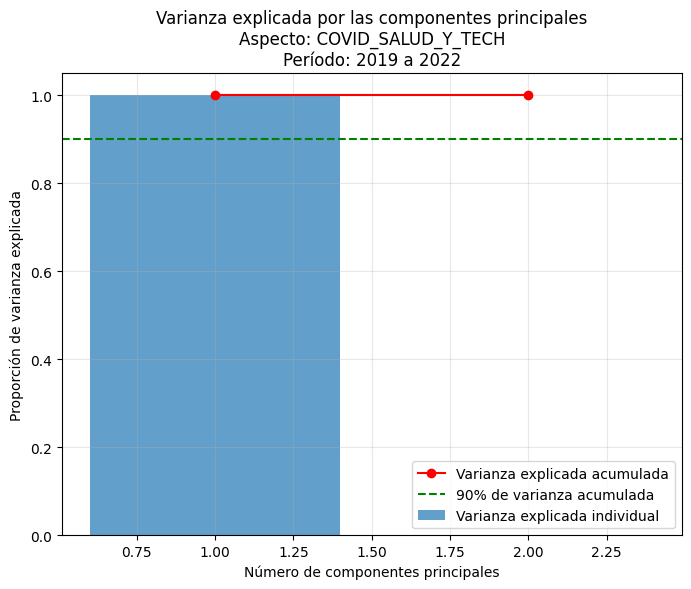

Componente 1: 1.0000 (1.0000 acumulado)
Componente 2: 0.0000 (1.0000 acumulado)
La varianza acumulada con las componentes principales disponibles es: 1.0000 (100.00%)


In [10]:
# Varianza explicada por cada componente principal
explained_variance_ratio = pca.explained_variance_ratio_

# Varianza acumulada
explained_variance_cumulative = np.cumsum(explained_variance_ratio)

# Visualización de la varianza explicada
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, label='Varianza explicada individual')
plt.plot(range(1, len(explained_variance_cumulative) + 1), explained_variance_cumulative, marker='o', color='red', label='Varianza explicada acumulada')
plt.title(f"Varianza explicada por las componentes principales\nAspecto: {aspecto_filtro}\nPeríodo: {desde} a {hasta}")
plt.xlabel('Número de componentes principales')
plt.ylabel('Proporción de varianza explicada')
plt.axhline(y=0.9, color='green', linestyle='--', label='90% de varianza acumulada')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Imprimir la varianza explicada
for i, ratio in enumerate(explained_variance_ratio, start=1):
    print(f"Componente {i}: {ratio:.4f} ({explained_variance_cumulative[i-1]:.4f} acumulado)")
# Mostrar el porcentaje de varianza acumulada con las componentes disponibles
print(f"La varianza acumulada con las componentes principales disponibles es: {cumulative_variance[-1]:.4f} ({cumulative_variance[-1] * 100:.2f}%)")


In [11]:
# Calcular las cargas de las variables originales en las componentes principales
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=columns_per
)
# Mostrar las cargas
display(loadings)


,PC1,PC2
per504,-0.707107,-0.707107
per411,0.707107,-0.707107


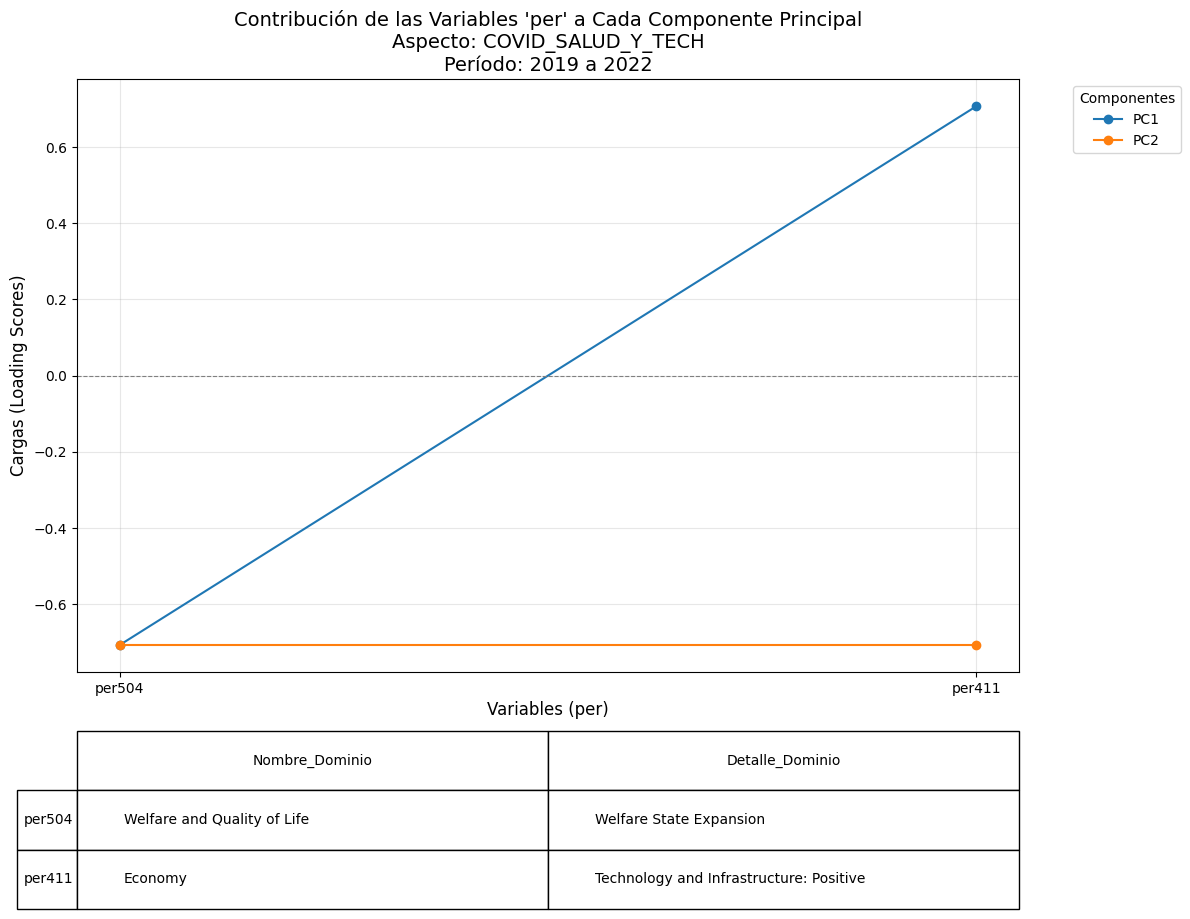

In [12]:
# Calcular las cargas (loading scores)
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=columns_per
)

# Obtener información de las variables del aspecto desde df_AD
variables_info = df_AD[df_AD['Variable_per'].isin(columns_per)][['Variable_per', 'Nombre_Dominio', 'Detalle_Dominio']]
variables_info = variables_info.set_index('Variable_per').reindex(columns_per)

# Graficar las cargas para cada componente principal
fig, ax = plt.subplots(figsize=(12, 10))

for i, col in enumerate(loadings.columns):
    ax.plot(loadings.index, loadings[col], marker='o', label=col)

# Configuración del gráfico
ax.set_title(f"Contribución de las Variables 'per' a Cada Componente Principal\nAspecto: {aspecto_filtro}\nPeríodo: {desde} a {hasta}", fontsize=14)
ax.set_xlabel('Variables (per)', fontsize=12)
ax.set_ylabel('Cargas (Loading Scores)', fontsize=12)
ax.set_xticks(range(len(loadings.index)))
ax.set_xticklabels(loadings.index, rotation=0, ha='center')
ax.axhline(0, color='gray', linestyle='--', linewidth=0.8)
ax.legend(title='Componentes', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(alpha=0.3)

# Crear la tabla con la información adicional
from matplotlib.table import Table

table_data = variables_info[['Nombre_Dominio', 'Detalle_Dominio']].values
table_col_labels = ['Nombre_Dominio', 'Detalle_Dominio']
table_row_labels = variables_info.index

# Agregar la tabla al gráfico
table = plt.table(cellText=table_data,
                  colLabels=table_col_labels,
                  rowLabels=table_row_labels,
                  cellLoc='left',
                  loc='bottom',
                  bbox=[0.0, -0.4, 1.0, 0.3])  # Ajustar posición y tamaño

# Ajustar diseño
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.0, 1.2)

plt.tight_layout()
plt.show()


In [13]:
# Mostrar los loading scores como una tabla
print("Loading Scores (Contribución de cada variable a las componentes principales):")
display(loadings.round(4))  # Limitar a 4 decimales para mayor claridad

Loading Scores (Contribución de cada variable a las componentes principales):


,PC1,PC2
per504,-0.7071,-0.7071
per411,0.7071,-0.7071


#### 3.Elbow + K-MEANS
* Con K-MEANS vemos si es que los componentes principales forman clusteres
* Para saber el número óptimo de clusteres en un método de clasificación como K_MEANS, usamos el "elbow method". Este método:
* * Calcula los WCSS (Within-Cluster Sum of Squares): Mide la suma de las distancias cuadradas entre los puntos de datos y el centroide de su clúster.
* * Se calcula WCSS para diferentes números de clústeres (kk)
* * Al graficar kk contra WCSS, la curva normalmente muestra una pendiente pronunciada que luego se estabiliza.
* * El "codo" es el punto donde la reducción en WCSS deja de ser significativa, indicando que agregar más clústeres no mejora sustancialmente la compactación

/Applications/anaconda3/envs/DatascienceUDD/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Applications/anaconda3/envs/DatascienceUDD/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Applications/anaconda3/envs/DatascienceUDD/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Applications/anaconda3/envs/DatascienceUDD/lib/python3.8/site-packages/sklearn/cluster/

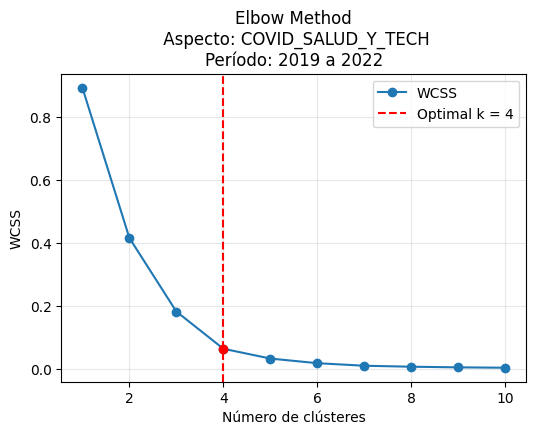

El número óptimo de clústeres (elbow method) es: 4


In [14]:
from kneed import KneeLocator

# Usar los datos normalizados de 'numeric_data' para calcular WCSS
data_scaled = numeric_data  # Asegúrate de que sea el conjunto de datos numéricos normalizados

# Calcular WCSS para determinar el número óptimo de clústeres
max_k = 10
wcss = []
for k in range(1, max_k + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

# Encontrar el codo automáticamente
kl = KneeLocator(range(1, max_k + 1), wcss, curve="convex", direction="decreasing")
optimal_k = kl.knee

# Graficar el método del codo
plt.figure(figsize=(6, 4))
plt.plot(range(1, max_k + 1), wcss, marker='o', label="WCSS")
plt.axvline(optimal_k, color='red', linestyle='--', label=f'Optimal k = {optimal_k}')
plt.scatter(optimal_k, wcss[optimal_k - 1], color='red', zorder=5)  # Punto del codo
plt.title(f"Elbow Method\n Aspecto: {aspecto_filtro}\nPeríodo: {desde} a {hasta}")
plt.xlabel('Número de clústeres')
plt.ylabel('WCSS')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

print(f"El número óptimo de clústeres (elbow method) es: {optimal_k}")


/Applications/anaconda3/envs/DatascienceUDD/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


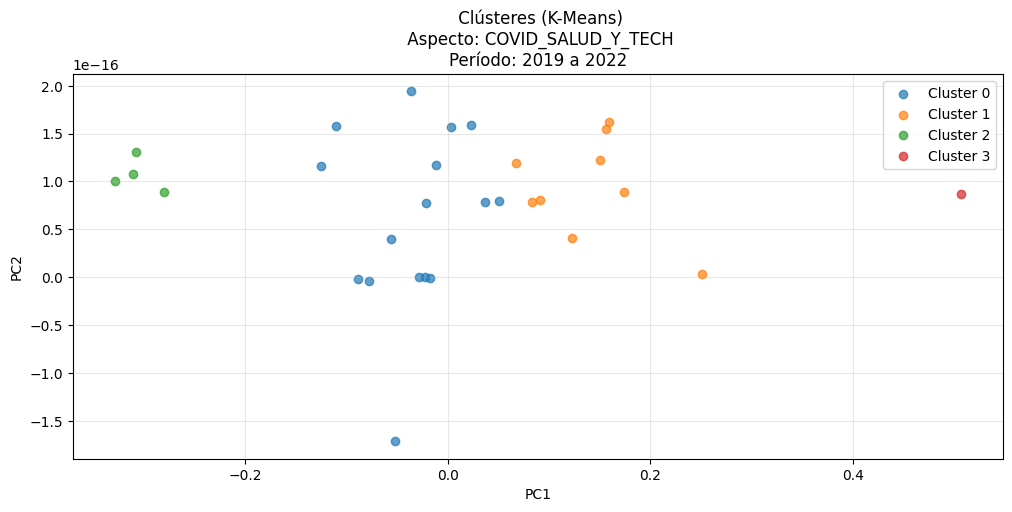

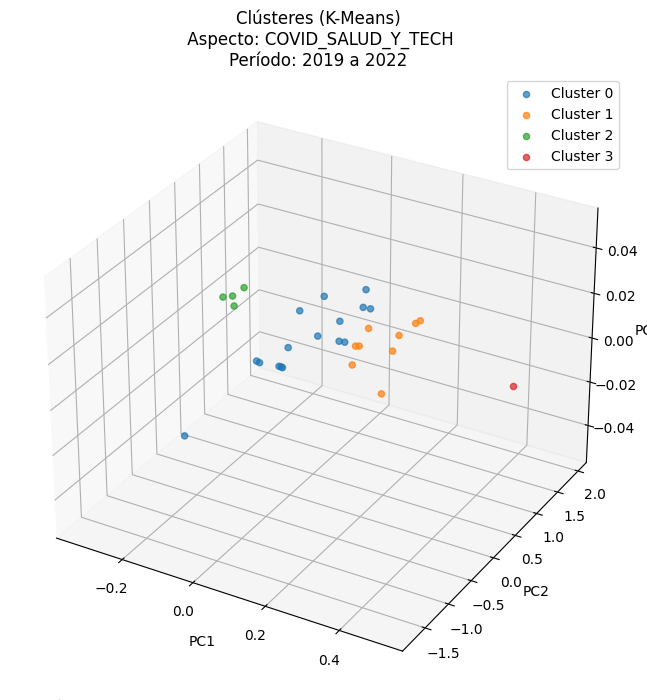

In [17]:
from mpl_toolkits.mplot3d import Axes3D
# Aplicar K-Means
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_pca['cluster'] = kmeans.fit_predict(df_pca[['PC1', 'PC2']])

# Visualizar clústeres en 2D
plt.figure(figsize=(12, 5))
for cluster in range(optimal_k):
    cluster_data = df_pca[df_pca['cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}', alpha=0.7)

plt.title(f" Clústeres (K-Means)\n Aspecto: {aspecto_filtro}\nPeríodo: {desde} a {hasta}")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Visualizar clústeres en 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for cluster in range(optimal_k):
    cluster_data = df_pca[df_pca['cluster'] == cluster]
    ax.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}', alpha=0.7)

ax.set_title(f"Clústeres (K-Means)\n Aspecto: {aspecto_filtro}\nPeríodo: {desde} a {hasta}")
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.legend()
plt.show()


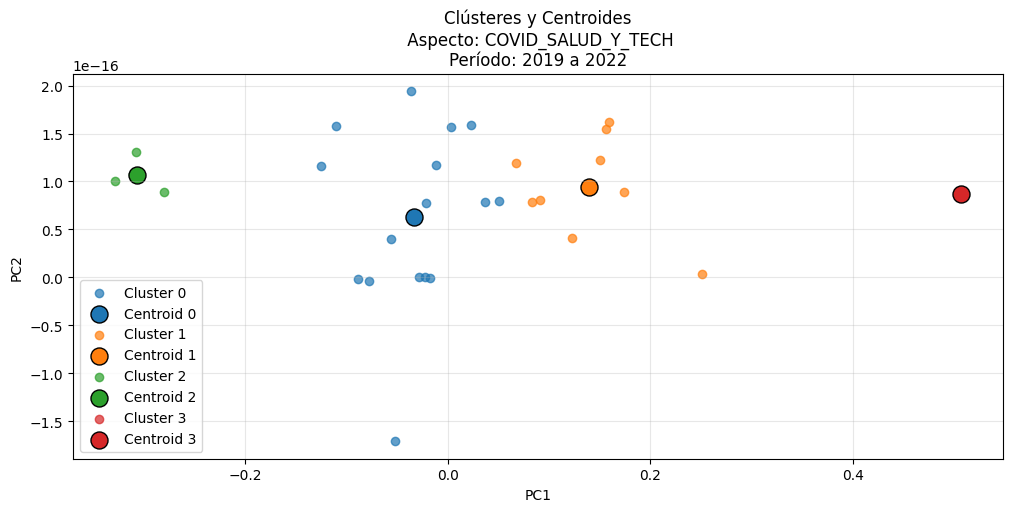

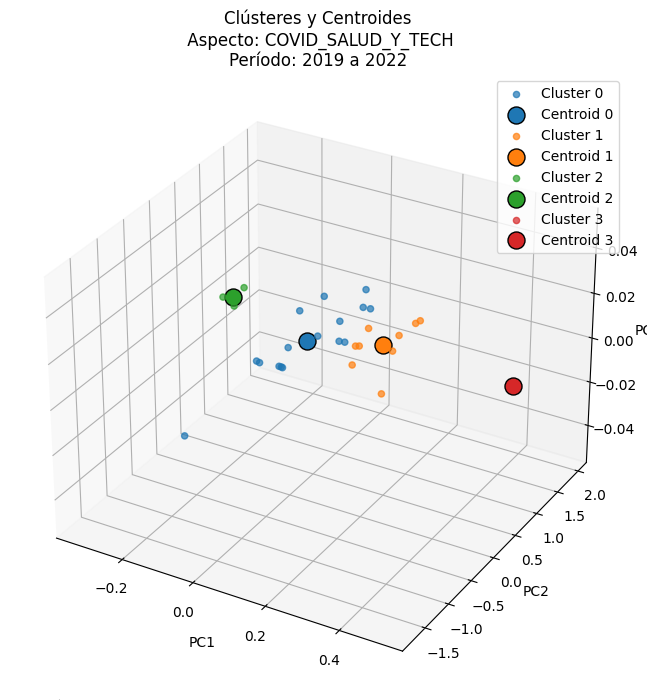

Coordenadas de los centroides:


,PC1,PC2
0,-0.033422,6.244092e-17
1,0.139560,9.446053e-17
2,-0.307007,1.071543e-16
3,0.506748,8.690430e-17


In [21]:
import matplotlib.pyplot as plt
import pandas as pd

# Obtener los centroides del modelo K-Means
centroids = kmeans.cluster_centers_

# Crear un DataFrame para los centroides con las etiquetas de los componentes principales
centroids_df = pd.DataFrame(centroids, columns=['PC1', 'PC2'])

# Crear una paleta de colores para los clústeres
colors = plt.cm.tab10(range(optimal_k))

# Gráfico en 2D
plt.figure(figsize=(12, 5))
for cluster in range(optimal_k):
    cluster_data = df_pca[df_pca['cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}', alpha=0.7, color=colors[cluster])
    
    # Añadir los centroides con el color correspondiente
    plt.scatter(centroids[cluster, 0], centroids[cluster, 1], color=colors[cluster], edgecolor='black', s=150, label=f'Centroid {cluster}')

plt.title(f"Clústeres y Centroides\n Aspecto: {aspecto_filtro}\nPeríodo: {desde} a {hasta}")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Gráfico en 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for cluster in range(optimal_k):
    cluster_data = df_pca[df_pca['cluster'] == cluster]
    ax.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}', alpha=0.7, color=colors[cluster])

    # Añadir los centroides con el color correspondiente
    ax.scatter(centroids[cluster, 0], centroids[cluster, 1], color=colors[cluster], edgecolor='black', s=150, label=f'Centroid {cluster}')

ax.set_title(f"Clústeres y Centroides\n Aspecto: {aspecto_filtro}\nPeríodo: {desde} a {hasta}")
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.legend()
plt.show()

# Mostrar las coordenadas de los centroides
print("Coordenadas de los centroides:")
display(centroids_df)


#### 4.Visualicemos qué países-programas hay en cada cluster

In [22]:
cluster_0_countries = df_pca[df_pca['cluster'] == 0]['countryname'].tolist()
print(cluster_0_countries)

['Argentina', 'Australia', 'Austria', 'Brazil', 'Canada', 'Finland', 'Georgia', 'Iceland', 'Lithuania', 'Moldova', 'Netherlands', 'New Zealand', 'Panama', 'Spain', 'United Kingdom', 'United States']


#### Clusters y países

In [23]:
# Explorar los países y períodos en cada clúster
for cluster in range(optimal_k):
    cluster_data = df_pca[df_pca['cluster'] == cluster]
    print(f"\nCluster {cluster}:")
    print(f"Total Programas: {len(cluster_data)}")
    print("Países y años:")
    display(cluster_data)
    # for country, group in cluster_data.groupby('countryname'):
    #     years = group['agno'].tolist()
    #     print(f"- {country}: {len(years)} programas ({', '.join(map(str, years))})")



Cluster 0:
Total Programas: 16
Países y años:


,countryname,agno,PC1,PC2,cluster
0,Argentina,2019,-0.052420,-1.708975e-16,0
3,Australia,2022,-0.011907,1.173767e-16,0
4,Austria,2019,-0.021835,7.703583e-17,0
6,Brazil,2022,0.050895,8.002714e-17,0
7,Canada,2019,-0.022045,1.166534e-19,0
11,Finland,2019,-0.036295,1.941103e-16,0
12,Georgia,2020,0.036604,7.873368e-17,0
15,Iceland,2021,-0.088496,-2.207971e-18,0
16,Lithuania,2020,-0.078122,-3.584336e-18,0
17,Moldova,2019,-0.125386,1.158802e-16,0



Cluster 1:
Total Programas: 9
Países y años:


,countryname,agno,PC1,PC2,cluster
1,Armenia,2021,0.159736,1.620443e-16,1
2,Australia,2019,0.150208,1.219477e-16,1
5,Belgium,2019,0.122264,4.124563e-17,1
8,Chile,2021,0.067626,1.191479e-16,1
10,Estonia,2019,0.083432,7.835926e-17,1
13,Germany,2021,0.091196,8.046745e-17,1
22,Portugal,2019,0.156216,1.543601e-16,1
23,South Africa,2019,0.174083,8.873267e-17,1
27,Ukraine,2019,0.251275,3.839773e-18,1



Cluster 2:
Total Programas: 4
Países y años:


,countryname,agno,PC1,PC2,cluster
9,Denmark,2019,-0.310660,1.078916e-16,2
14,Greece,2019,-0.308486,1.307526e-16,2
24,South Korea,2020,-0.328640,1.006495e-16,2
26,Sweden,2022,-0.280242,8.932324e-17,2



Cluster 3:
Total Programas: 1
Países y años:


,countryname,agno,PC1,PC2,cluster
18,Montenegro,2020,0.506748,8.690430e-17,3


#### Países y sus cluster

In [17]:
# df_pca

In [18]:
cluster_0_countries = df_pca[df_pca['cluster'] == 3]['countryname'].tolist()
print(cluster_0_countries)

['Greece', 'Moldova', 'South Korea', 'Sweden']


#### **ANÁLISIS DEL CLUSTER 0 en el período 2019 a 2022**
* **Países en el cluster 0:** ['Montenegro', 'Ukraine']

* Los siguientes factores destacan como elementos comunes:

#### **1. Respuesta Sanitaria**
- **Montenegro**: Siendo un país pequeño con un sistema de salud limitado, implementó medidas estrictas de cuarentena y confinamiento desde el inicio. Dependió en gran medida de la ayuda internacional, incluida la entrega de vacunas a través de mecanismos como COVAX.
- **Ucrania**: Aunque más grande que Montenegro, Ucrania también enfrentó desafíos significativos debido a su sistema de salud, debilitado por conflictos internos y problemas de financiamiento. Ucrania implementó cierres estrictos y dependió de la cooperación internacional para obtener vacunas.

Ambos países compartieron una **dependencia de la ayuda internacional** y enfrentaron **desafíos de capacidad en sus sistemas de salud**.

#### **2. Impacto Económico**
- Ambos países tienen economías dependientes en gran medida de sectores vulnerables al COVID, como el turismo (en el caso de Montenegro) y la industria y el comercio (en Ucrania). 
- **Montenegro** experimentó una de las mayores caídas económicas en Europa debido a su fuerte dependencia del turismo. 
- **Ucrania**, por su parte, enfrentó disrupciones en el comercio y dificultades económicas internas que se agravaron por la pandemia.

#### **3. Aspectos Políticos y Sociales**
- **Montenegro**:
  - Durante la pandemia, Montenegro vivió tensiones políticas internas, con protestas relacionadas con la gestión de la crisis sanitaria.
  - Su posición geopolítica y las restricciones de movilidad afectaron severamente su conectividad y economía.
  
- **Ucrania**:
  - El conflicto con Rusia, especialmente en el este de Ucrania, complicó los esfuerzos para coordinar una respuesta efectiva al COVID.
  - Las tensiones políticas internas también dificultaron la implementación de medidas de contención.

Ambos países enfrentaron **tensiones políticas internas** durante la pandemia, lo que dificultó su capacidad de respuesta coordinada.

#### **4. Dependencia de Vacunas Externas**
- Ambos países se enfrentaron a desafíos para adquirir vacunas en las etapas iniciales y dependieron en gran medida de iniciativas internacionales como COVAX.

#### **Conclusión**
Montenegro y Ucrania se agrupan en el mismo clúster debido a características comunes como:
1. **Sistemas de salud limitados**, con dependencia de ayuda internacional.
2. **Impacto económico significativo**, especialmente en sectores clave como el turismo y el comercio.
3. **Tensiones políticas internas** que complicaron la respuesta a la pandemia.
4. **Dependencia de iniciativas internacionales** para la adquisición de vacunas.

Esto sugiere que los programas de gobierno de ambos países podrían haber reflejado temas como:
- Medidas de contención estrictas.
- Necesidad de apoyo económico y sanitario internacional.
- Enfoque en la recuperación económica y fortalecimiento de sistemas de salud.

---

#### **ANÁLISIS DEL CLUSTER 1 en el período 2019 a 2022**
* **Países en el cluster 1:** ['Argentina', 'Australia', 'Austria', 'Belgium', 'Brazil', 'Canada', 'Chile', 'Denmark', 'Finland', 'Germany', 'Netherlands', 'Portugal', 'South Africa', 'Spain', 'United Kingdom', 'United States']

* El cluster 1 incluye países con economías más desarrolladas o de ingreso medio-alto, que a pesar de sus diferencias económicas, tienen sistemas institucionales relativamente fuertes y una visión orientada a la cooperación internacional y la planificación a largo plazo.

#### **1. Respuesta Sanitaria**
- **Estructuras Sanitarias Robustas**: 
  - La mayoría de estos países cuentan con sistemas de salud relativamente desarrollados, aunque con variaciones en la cobertura universal (por ejemplo, el NHS en el Reino Unido frente al sistema fragmentado de Estados Unidos).
  - Implementaron medidas de contención como cierres, distanciamiento social y restricciones de movilidad, con énfasis en evitar la sobrecarga hospitalaria.
  - Disponibilidad temprana de vacunas en 2021, con planes masivos de vacunación. 

#### **2. Políticas de Estímulo Económico**
- **Rescate Financiero y Apoyo Social**:
  - La mayoría de los países implementaron paquetes de estímulo económico significativos, incluyendo:
    - Transferencias directas de efectivo a ciudadanos (por ejemplo, cheques en Estados Unidos y subsidios en Chile y Argentina).
    - Apoyo financiero a empresas para evitar despidos masivos.
    - Inversión en sectores como salud, educación y digitalización.
  - Ejemplo: Los países europeos como Alemania y Dinamarca priorizaron la protección del empleo mediante programas de trabajo reducido.

#### **3. Priorización de la Ciencia**
- **Confianza en la Ciencia y las Vacunas**:
  - Estos países impulsaron campañas para promover la vacunación masiva desde etapas tempranas.
  - La mayoría destinó recursos a la investigación de vacunas, tratamientos y testeo masivo.
  - Por ejemplo:
    - Reino Unido fue uno de los primeros en aprobar la vacuna de Pfizer/BioNTech.
    - Argentina participó en la producción de la vacuna AstraZeneca.
    - Estados Unidos lideró la innovación con programas como "Operation Warp Speed".

#### **4. Efectos en la Economía**
- **Diversidad Económica**:
  - Las economías de estos países son diversas y suelen incluir sectores resilientes como servicios, manufactura y tecnología.
  - Sin embargo, países como Argentina y Sudáfrica enfrentaron mayores desafíos debido a estructuras económicas menos diversificadas y problemas económicos preexistentes.
  - Sectores clave afectados incluyeron:
    - Turismo (España, Portugal, Argentina, Sudáfrica).
    - Comercio internacional y manufactura (Alemania, Estados Unidos, China como socio comercial).

#### **5. Reacción Social y Políticas de Cierre**
- **Movimientos Sociales y Desigualdad**:
  - En varios países (Argentina, Brasil, Estados Unidos, Chile), la pandemia exacerbó tensiones sociales existentes.
  - Países como Estados Unidos y Brasil enfrentaron controversias sobre la implementación de medidas de confinamiento y el uso de mascarillas.
  - En contraste, países como Dinamarca y Finlandia adoptaron medidas tempranas y lograron mayor cumplimiento social.

#### **6. Transición hacia la Recuperación**
- **Planificación Post-COVID**:
  - La mayoría de estos países incorporaron planes de recuperación económica y social en sus programas de gobierno, con énfasis en:
    - Inversión en salud pública.
    - Digitalización de servicios y trabajo remoto.
    - Sostenibilidad y energías renovables (Europa, Canadá, Australia).

#### **7. Participación en Redes Internacionales**
- **Cooperación Internacional**:
  - Participación activa en iniciativas globales como COVAX para la distribución equitativa de vacunas.
  - Países como Canadá, Reino Unido y Alemania lideraron esfuerzos de cooperación científica y económica.

#### **Conclusión**
Los programas de gobierno de estos países reflejan:
1. **Fortalecimiento de los sistemas de salud pública.**
2. **Medidas de estímulo económico, con énfasis en protección social y recuperación económica.**
3. **Prioridad en la ciencia, tecnología y sostenibilidad.**
4. **Respuestas diferenciadas según niveles de desigualdad y tensiones sociales.**

---

#### **ANÁLISIS DEL CLUSTER 2 en el período 2019 a 2022**
* **Países en el cluster 2:** ['Armenia', 'Australia', 'Estonia', 'Georgia', 'Iceland', 'Lithuania', 'New Zealand', 'Panama']

* Este cluster refleja cómo países pequeños o de tamaño medio lograron gestionar la crisis de manera eficiente, a menudo con soluciones innovadoras y adaptativas, lo que podría estar reflejado en sus programas de gobierno.

#### **1. Respuesta Sanitaria**
- **Enfoque en Sistemas de Salud Compactos y Resilientes**:
  - Estos países, aunque más pequeños en población o tamaño, priorizaron la contención temprana del virus:
    - **Nueva Zelanda e Islandia**: Ejemplos destacados por implementar estrategias rápidas de cierre de fronteras y medidas de aislamiento.
    - **Estonia y Lituania**: Rápida adopción de tecnología para rastreo de contactos y gestión de la pandemia.
  - Suelen tener sistemas de salud con menos capacidad hospitalaria en comparación con grandes economías, pero lograron evitar la saturación mediante políticas preventivas.

#### **2. Gestión de la Pandemia**
- **Medidas Rápidas de Cierre y Restricciones**:
  - Países como Nueva Zelanda y Australia implementaron cierres estrictos y prolongados para controlar la transmisión comunitaria.
  - Armenia, Georgia y Panamá adoptaron cuarentenas obligatorias y restricciones de movilidad para mitigar la propagación.

- **Éxito en la Contención**:
  - Islandia, Lituania y Estonia lograron mantener niveles bajos de contagios en las primeras olas mediante estrategias de testeo masivo y cuarentenas.

#### **3. Políticas de Recuperación Económica**
- **Incentivos Económicos para Sectores Vulnerables**:
  - Programas de apoyo a pequeñas y medianas empresas.
  - Nueva Zelanda y Australia destinaron fondos significativos para mantener el empleo y garantizar estabilidad económica durante los confinamientos prolongados.
  - Estonia y Lituania invirtieron en digitalización para apoyar a empresas y educación remota.

- **Dependencia de Sectores Críticos**:
  - Países como Panamá, Armenia y Georgia enfrentaron desafíos económicos debido a su dependencia del turismo y las remesas.

#### **4. Uso de Tecnología y Gobernanza Digital**
- **Adopción de Tecnología en la Gestión**:
  - Estonia lideró la digitalización en la pandemia, utilizando sus avanzados sistemas de gobierno electrónico para garantizar continuidad en servicios esenciales.
  - Lituania y Georgia adoptaron plataformas digitales para la educación y el rastreo de contactos.

#### **5. Reacciones Sociales y Cumplimiento**
- **Confianza en las Instituciones**:
  - Países como Islandia y Nueva Zelanda, con altos niveles de confianza social y gobernanza transparente, lograron mayor cumplimiento de las medidas restrictivas.
  - En contraste, Armenia y Georgia enfrentaron desafíos relacionados con tensiones políticas internas.

#### **6. Cooperación Internacional**
- **Participación en Iniciativas Globales**:
  - Estos países participaron activamente en el programa COVAX y otras iniciativas para garantizar acceso a vacunas.
  - Algunos, como Islandia y Estonia, priorizaron la solidaridad internacional y el apoyo a países vecinos.

#### **7. Respuesta Innovadora y Escalabilidad**
- **Flexibilidad Institucional**:
  - Debido a su tamaño y estructuras menos complejas, países como Islandia, Estonia y Nueva Zelanda pudieron implementar medidas personalizadas y ajustarlas rápidamente según las circunstancias.

#### **Conclusión**
Los países de este cluster comparten:
1. **Enfoque en medidas preventivas y rápidas respuestas gubernamentales.**
2. **Uso innovador de la tecnología en gestión de la pandemia.**
3. **Desafíos específicos en economías dependientes de sectores como turismo y remesas.**
4. **Confianza social y gobernanza transparente como clave para el cumplimiento de políticas.**
---


#### **ANÁLISIS DEL CLUSTER 3 en el período 2019 a 2022**
* **Países en el cluster 3:** ['Greece', 'Moldova', 'South Korea', 'Sweden']

* Aunque los enfoques varían ampliamente, estos países comparten el desafío de equilibrar la salud pública con el impacto económico, reflejando esta diversidad en sus programas de gobierno.
---

#### **1. Respuesta Sanitaria**
- **Diferentes Estrategias de Contención**:
  - **Suecia**:
    - Optó por un enfoque único basado en la inmunidad colectiva en las primeras fases de la pandemia, con restricciones voluntarias en lugar de medidas obligatorias.
    - Esta estrategia generó un debate global, ya que evitó cierres estrictos, priorizando la economía, pero enfrentó altos índices de contagios y mortalidad inicial.
  - **Corea del Sur**:
    - Reconocida por su modelo de rastreo y testeo masivo sin recurrir a cierres estrictos, con uso extensivo de tecnología y cumplimiento social.
    - Innovación en el rastreo de contactos a través de datos móviles y cámaras de seguridad.
  - **Grecia y Moldavia**:
    - Grecia implementó cierres estrictos al principio de la pandemia, logrando controlar la primera ola con éxito. Posteriormente enfrentó desafíos en la implementación de políticas económicas.
    - Moldavia, con un sistema de salud más limitado, implementó cuarentenas estrictas y dependió en gran medida de la ayuda internacional.

#### **2. Gestión de la Pandemia**
- **Suecia y Corea del Sur: Respuestas Contrapuestas**:
  - Suecia evitó restricciones severas, mientras que Corea del Sur adoptó estrategias rápidas y tecnológicas para contener la propagación sin cierres masivos.
- **Grecia y Moldavia**:
  - Ambas experimentaron dificultades debido a limitaciones económicas y sanitarias, adoptando medidas tradicionales como cuarentenas y restricciones de movimiento.

- **Éxito Relativo**:
  - Corea del Sur se destacó por mantener tasas de mortalidad bajas.
  - Grecia controló inicialmente el virus, pero enfrentó olas posteriores con mayores desafíos.
  - Suecia ajustó sus políticas tras críticas iniciales, adoptando restricciones más estrictas en 2021.

#### **3. Políticas de Recuperación Económica**
- **Impacto Económico Significativo**:
  - Grecia y Moldavia, con economías más frágiles, enfrentaron una contracción económica severa, agravada por su dependencia del turismo y las remesas.
  - Suecia y Corea del Sur, con economías más diversificadas, se recuperaron más rápidamente gracias a estímulos fiscales y apoyo a empresas.

- **Medidas de Apoyo**:
  - **Corea del Sur**: Implementó paquetes de estímulo económico y apoyo a pequeñas empresas.
  - **Suecia**: Enfocó esfuerzos en preservar el empleo y mantener la actividad económica.
  - **Grecia y Moldavia**: Dependieron más de la ayuda internacional y préstamos para financiar medidas de estímulo.

#### **4. Innovación y Tecnología**
- **Corea del Sur: Líder Tecnológico**:
  - Sobresalió en el uso de aplicaciones de rastreo, pruebas masivas y monitoreo digital.
- **Suecia**:
  - Enfocó esfuerzos en mantener las actividades educativas y económicas utilizando tecnologías digitales.
- **Grecia y Moldavia**:
  - Menor capacidad tecnológica, pero adoptaron soluciones digitales básicas para educación y comunicación.

#### **5. Cooperación Internacional**
- **Ayuda Externa**:
  - Moldavia y Grecia dependieron significativamente de la ayuda internacional, incluidos programas de la OMS y la UE.
  - Corea del Sur contribuyó activamente con donaciones y conocimiento técnico a nivel internacional.
- **Suecia**:
  - Aunque enfrentó críticas por su enfoque inicial, mantuvo su compromiso con la cooperación internacional y apoyo a países en desarrollo.

#### **6. Reacciones Sociales y Políticas**
- **Confianza y Cumplimiento**:
  - Corea del Sur y Suecia contaron con niveles relativamente altos de confianza en las instituciones, lo que facilitó el cumplimiento de políticas.
  - Grecia y Moldavia enfrentaron protestas y tensiones sociales debido a restricciones y problemas económicos.

#### **Conclusión**
Este cluster refleja una diversidad de enfoques ante el COVID-19:
1. **Corea del Sur**: Enfoque tecnológico, testeo masivo y alta eficiencia en la gestión.
2. **Suecia**: Modelo único centrado en evitar restricciones severas y priorizar la economía.
3. **Grecia y Moldavia**: Enfoques más tradicionales con restricciones severas, pero limitados por recursos económicos y sanitarios.
---